In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.lines as mlines
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.anova import anova_lm

In [2]:
# df here stands for exactly the same as it does in file "01" and "02";
df = pd.read_csv("Raw Data.csv") # The name of participants have been removed right after the experiment.
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
df.isnull().sum()

age              0
gender           0
SPS              0
FA1              0
FA2              0
FA3              0
FA4              0
RAT              0
BT               0
CSE              0
Group            0
Stage1           0
Stage2           0
Num              0
Stage2_Stage1    0
dtype: int64

In [3]:
df.describe()

,age,gender,SPS,FA1,FA2,FA3,FA4,RAT,BT,CSE,Group,Stage1,Stage2,Num,Stage2_Stage1
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,19.901478,1.773399,101.049261,5.201970,8.285714,12.142857,9.192118,6.078818,4.901478,27.162562,0.507389,13.487685,21.334975,108.931034,7.847291
std,1.210575,0.419667,11.640980,3.329079,4.915841,6.703353,4.110785,2.247924,2.036826,6.612183,0.501181,7.227121,9.768413,62.101683,8.050050
min,18.000000,1.000000,65.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,7.000000,0.000000,3.000000,5.000000,1.000000,-17.000000
25%,19.000000,2.000000,94.000000,3.000000,5.000000,7.000000,6.000000,5.000000,3.000000,23.000000,0.000000,8.000000,14.000000,55.500000,2.000000
50%,20.000000,2.000000,102.000000,4.000000,7.000000,11.000000,9.000000,6.000000,5.000000,28.000000,1.000000,12.000000,19.000000,109.000000,7.000000
75%,21.000000,2.000000,109.000000,7.000000,11.000000,15.500000,11.500000,8.000000,6.000000,32.000000,1.000000,17.000000,28.000000,161.500000,13.000000
max,22.000000,2.000000,128.000000,18.000000,23.000000,34.000000,22.000000,11.000000,10.000000,42.000000,1.000000,37.000000,49.000000,216.000000,35.000000


In [4]:
# ---- Step 0: Prepare the dataset ----
# Columns: 'SPS', 'Group', 'RAT', 'BT', 'CSE'
df_anova = df.dropna(subset=['SPS', 'Group', 'RAT', 'BT', 'CSE']).copy()

# Categorize SPS into three groups: Low, Medium, High
df_anova['SPS_Group'] = pd.qcut(df_anova['SPS'], q=3, labels=['Low', 'Medium', 'High'])

# Ensure Group is categorical (0 = Game / Low stress, 1 = Test / High stress)
df_anova['Group'] = df_anova['Group'].astype('category')

# ---- Step 1: Two-way ANOVA for BT (Divergent Thinking) ----
model_bt = ols("BT ~ C(SPS_Group) * C(Group)", data=df_anova).fit()
anova_bt = sm.stats.anova_lm(model_bt, typ=2)  # Type II ANOVA
print("BT (Divergent Thinking) ANOVA:")
print(anova_bt)

# ---- Step 2: Two-way ANOVA for RAT (Convergent Thinking) ----
model_rat = ols("RAT ~ C(SPS_Group) * C(Group)", data=df_anova).fit()
anova_rat = sm.stats.anova_lm(model_rat, typ=2)
print("\nRAT (Convergent Thinking) ANOVA:")
print(anova_rat)

# ---- Step 3: Two-way ANOVA for CSE (Creativity Self-Efficacy) ----
model_cse = ols("CSE ~ C(SPS_Group) * C(Group)", data=df_anova).fit()
anova_cse = sm.stats.anova_lm(model_cse, typ=2)
print("\nCSE (Creativity Self-Efficacy) ANOVA:")
print(anova_cse)

BT (Divergent Thinking) ANOVA:
                           sum_sq     df         F    PR(>F)
C(SPS_Group)            20.706447    2.0  2.527773  0.082424
C(Group)                 1.425093    1.0  0.347941  0.555957
C(SPS_Group):C(Group)    8.131759    2.0  0.992698  0.372422
Residual               806.870241  197.0       NaN       NaN

RAT (Convergent Thinking) ANOVA:
                            sum_sq     df         F    PR(>F)
C(SPS_Group)              4.241082    2.0  0.412805  0.662362
C(Group)                  1.495178    1.0  0.291066  0.590148
C(SPS_Group):C(Group)     2.509293    2.0  0.244242  0.783535
Residual               1011.970791  197.0       NaN       NaN

CSE (Creativity Self-Efficacy) ANOVA:
                            sum_sq     df         F    PR(>F)
C(SPS_Group)             77.331158    2.0  0.883569  0.414936
C(Group)                  2.941362    1.0  0.067215  0.795707
C(SPS_Group):C(Group)   132.556668    2.0  1.514564  0.222453
Residual               8620.85130

### Overall Conclusion (General)

Across all three dimensions (BT, RAT, CSE), no statistically significant main effects or interactions were detected for SPS (sensory sensitivity) or stress group.

This suggests that, in this dataset, sensitivity traits and stress conditions do not differentially influence divergent thinking, convergent thinking, or self-efficacy.

**Future research direction**: Although current results are null, exploring other contexts, tasks, or more sensitive measures might reveal specific matches between sensitivity traits and particular creativity type.

### Potential Research Fields
While the general analysis provides an overarching picture of creativity change, it does not fully account for individual differences that may shape this process. To obtain a more nuanced understanding, the following sections examine specific variables—Gender, CSE, and cross-stage dynamics—that could moderate or refine the general findings.

### Gender

Gender has long been recognized as a factor influencing learning strategies, cognitive styles, and creativity-related outcomes. By analyzing creativity change across male and female participants, we can evaluate whether gender moderates the patterns identified in the general conclusion.

=== MANOVA ===
                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept         Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0719 5.0000 195.0000 503.7926 0.0000
         Pillai's trace  0.9281 5.0000 195.0000 503.7926 0.0000
 Hotelling-Lawley trace 12.9178 5.0000 195.0000 503.7926 0.0000
    Roy's greatest root 12.9178 5.0000 195.0000 503.7926 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
           gender         Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.9428 5.0000 195.0000  2.3678 0.0410
           Pillai's trace 0.0572 5.0000 195.

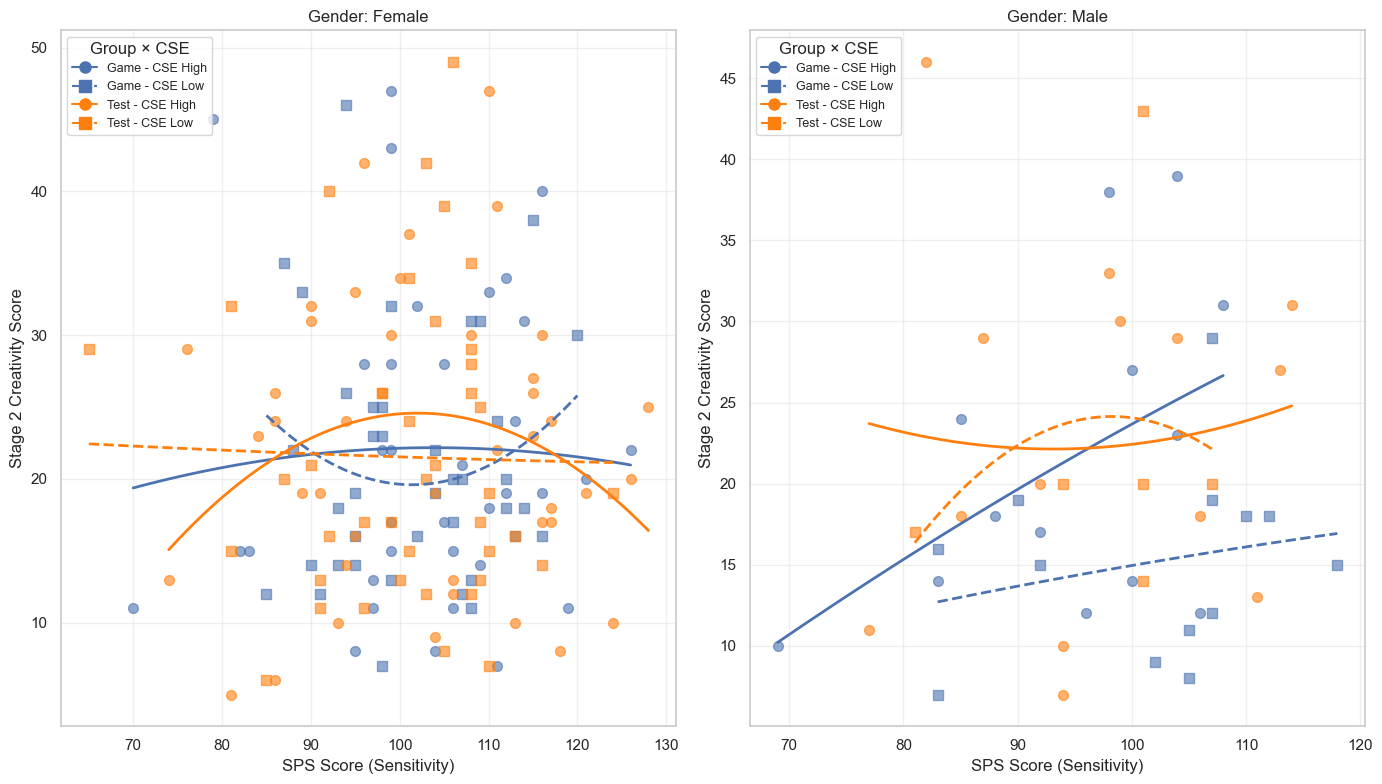

In [5]:
# -------------------------------
# Step 0: Prepare data
# -------------------------------
df_analysis = df.dropna(subset=['Stage1', 'Stage2', 'SPS', 'RAT', 'BT', 'CSE', 'gender', 'Group']).copy()

# Map gender numeric to text
gender_map = {1.0: 'Male', 2.0: 'Female'}
df_analysis['gender'] = df_analysis['gender'].map(gender_map).astype('category')

# Ensure Group is categorical
df_analysis['Group'] = df_analysis['Group'].astype('category')

# Create high/low CSE group for visualization
median_cse = df_analysis['CSE'].median()
df_analysis['CSE_Group'] = np.where(df_analysis['CSE'] >= median_cse, 'High', 'Low')
df_analysis['CSE_Group'] = df_analysis['CSE_Group'].astype('category')

# -------------------------------
# Step 1: MANOVA
# -------------------------------
print("=== MANOVA ===")
manova = MANOVA.from_formula('Stage1 + Stage2 + RAT + BT + CSE ~ gender * Group', data=df_analysis)
print(manova.mv_test())

# -------------------------------
# Step 2: Univariate ANOVA / ANCOVA
# -------------------------------
dv_list = ['Stage1', 'Stage2', 'RAT', 'BT', 'CSE']
for dv in dv_list:
    print(f"\n=== ANCOVA for {dv} (SPS as covariate) ===")
    formula = f'{dv} ~ C(gender) * C(Group) + SPS'
    model = smf.ols(formula, data=df_analysis).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

# -------------------------------
# Step 3: Visualization
# -------------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Define style rules
colors_group = {0: "#4C72B0", 1: "#FF7F0E"}  # 0=Game, 1=Test
labels_group = {0: "Game", 1: "Test"}
markers_cse = {'High': 'o', 'Low': 's'}
linestyles_cse = {'High': '-', 'Low': '--'}

genders = df_analysis['gender'].cat.categories

for i, gender in enumerate(genders):
    plt.subplot(1, len(genders), i + 1)
    df_gender = df_analysis[df_analysis['gender'] == gender].copy()

    handles = []  # custom legend handles

    for group in df_gender['Group'].cat.categories:
        for cse in df_gender['CSE_Group'].cat.categories:
            df_sub = df_gender[(df_gender['Group'] == group) & (df_gender['CSE_Group'] == cse)].copy()
            
            # Scatter points
            plt.scatter(
                df_sub['SPS'], df_sub['Stage2'],
                alpha=0.6, s=50,
                color=colors_group[group],
                marker=markers_cse[cse]
            )
            
            # Quadratic trend line
            df_sub['SPS_sq'] = df_sub['SPS'] ** 2
            model_quad = smf.ols("Stage2 ~ SPS + SPS_sq", data=df_sub).fit()
            SPS_range = np.linspace(df_sub['SPS'].min(), df_sub['SPS'].max(), 100)
            pred_df = pd.DataFrame({'SPS': SPS_range, 'SPS_sq': SPS_range**2})
            pred_line = model_quad.predict(pred_df)
            
            plt.plot(
                SPS_range, pred_line,
                color=colors_group[group],
                linestyle=linestyles_cse[cse],
                lw=2
            )

            # Custom legend handle (line + marker together)
            legend_handle = mlines.Line2D(
                [], [], 
                color=colors_group[group],
                marker=markers_cse[cse],
                linestyle=linestyles_cse[cse],
                markersize=8,
                label=f"{labels_group[group]} - CSE {cse}"
            )
            handles.append(legend_handle)

    plt.xlabel("SPS Score (Sensitivity)")
    plt.ylabel("Stage 2 Creativity Score")
    plt.title(f"Gender: {gender}")
    plt.legend(
        handles=handles,
        title="Group × CSE",
        loc='upper left',
        fontsize=9
    )
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Conclusion (Based on Gender)

The multivariate analysis (MANOVA) indicates that both gender and stress group have significant effects on overall creativity-related measures (Stage1, Stage2, RAT, BT, CSE), while their interaction is not significant. 

**Stage1 (Pre-Grouping Measure):** Since Stage1 was assessed **before participants were assigned to stress groups**, any observed effects of gender, group, or their interaction likely reflect **baseline differences rather than causal effects of stress**. The significant gender × group effect on Stage1 suggests that males and females may have had slightly different baseline performance levels, which should be controlled for in subsequent analyses.

**Stage2, RAT, BT, and CSE:** Univariate ANCOVAs reveal that:
- **Divergent thinking (BT)** is significantly influenced by gender, with males and females showing distinct performance levels.
- **Stage2, RAT, and creativity self-efficacy (CSE)** do not exhibit significant differences across gender or stress conditions.
- **Sensitivity (SPS)** as a covariate does not show a notable impact on these outcomes.

**Interpretation:** These findings suggest that while overall statistical interactions are limited, **gender and stress can shape certain aspects of creative performance**, particularly divergent thinking, and that baseline performance differences (Stage1) should be considered when interpreting the effects of stress and gender in subsequent stages.

### About Chart
In the chart, participants of different genders show very different data distribution curves. This phenomenon requires more data support for further research.

### CSE

Beyond gender, Creativity Self-Efficacy (CSE) represents another critical dimension that may shape creativity outcomes. Individuals with higher CSE are more likely to engage in divergent thinking and persist in problem solving, which could amplify or buffer the effects observed in the general conclusion. Thus, a closer examination of CSE provides additional explanatory power.

ANCOVA (SPS continuous, CSE as covariate):
                    sum_sq     df         F    PR(>F)
C(Group)        111.435205    1.0  1.165593  0.281622
SPS              42.183662    1.0  0.441234  0.507300
SPS:C(Group)     45.759349    1.0  0.478635  0.489852
CSE             158.578710    1.0  1.658706  0.199281
Residual      18929.561230  198.0       NaN       NaN

Three-way ANOVA (SPS continuous, CSE high/low factor):
                                 sum_sq     df         F    PR(>F)
C(Group)                      93.292888    1.0  0.960441  0.328290
C(CSE_Group)                 109.553703    1.0  1.127845  0.289549
C(Group):C(CSE_Group)         26.246416    1.0  0.270204  0.603784
SPS                           42.057747    1.0  0.432980  0.511306
SPS:C(Group)                  44.898637    1.0  0.462227  0.497391
SPS:C(CSE_Group)               6.298220    1.0  0.064840  0.799272
SPS:C(Group):C(CSE_Group)      3.818808    1.0  0.039314  0.843034
Residual                   18941.414357  

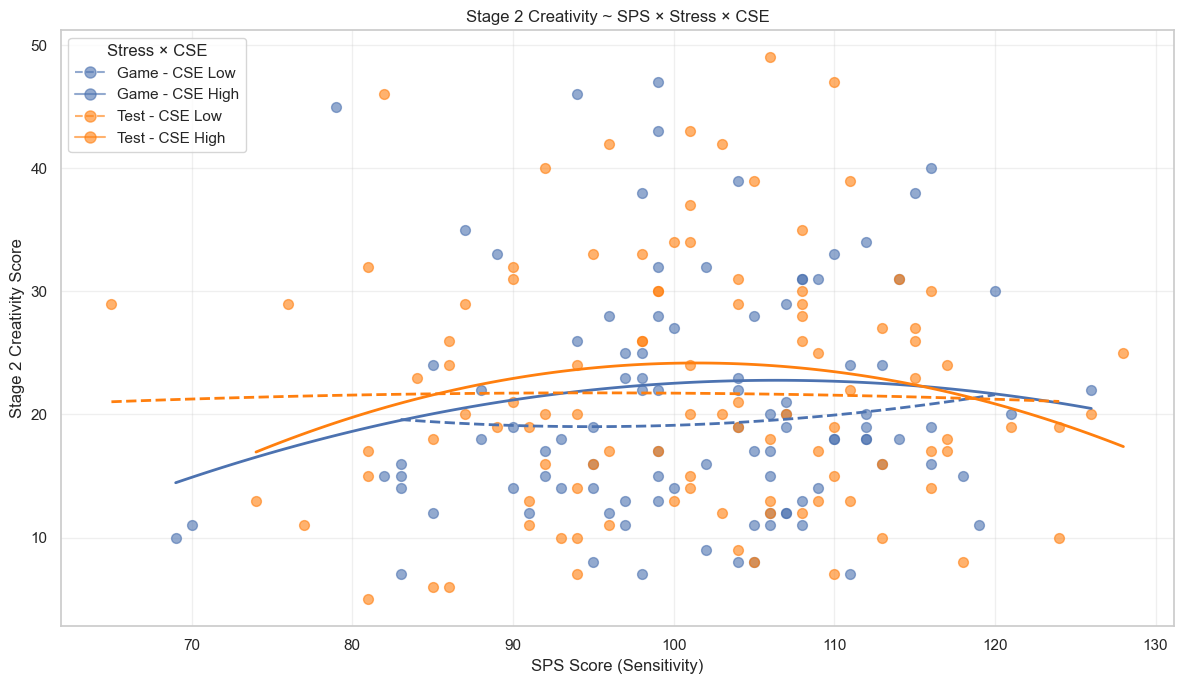

In [6]:
# ---- Step 0: Prepare data ----
df_cov = df.dropna(subset=['Stage2', 'SPS', 'Group', 'CSE']).copy()
median_cse = df_cov['CSE'].median()
df_cov['CSE_Group'] = np.where(df_cov['CSE'] >= median_cse, 'High', 'Low')
df_cov['CSE_Group'] = df_cov['CSE_Group'].astype('category')
df_cov['Group'] = df_cov['Group'].astype('category')

# ---- Step 1: ANCOVA (SPS continuous, CSE as covariate) ----
model_ancova = smf.ols("Stage2 ~ SPS * C(Group) + CSE", data=df_cov).fit()
print("ANCOVA (SPS continuous, CSE as covariate):")
print(sm.stats.anova_lm(model_ancova, typ=2))

# ---- Step 2: Three-way ANOVA (SPS continuous, CSE as factor High/Low) ----
model_3way = smf.ols("Stage2 ~ SPS * C(Group) * C(CSE_Group)", data=df_cov).fit()
print("\nThree-way ANOVA (SPS continuous, CSE high/low factor):")
print(sm.stats.anova_lm(model_3way, typ=2))

# ---- Step 3: Visualization ----
plt.figure(figsize=(12, 7))

colors_group = {0: "#4C72B0", 1: "#FF7F0E"}  # 0=Game, 1=Test
linestyles_cse = {'Low': '--', 'High': '-'}
labels_group = {0: "Game", 1: "Test"}

# Prepare legend handles
legend_handles = []

for group in [0, 1]:
    for cse in ['Low', 'High']:
        df_sub = df_cov[(df_cov['Group'] == group) & (df_cov['CSE_Group'] == cse)].copy()
        if df_sub.empty:
            continue
        
        # Scatter points
        plt.scatter(df_sub['SPS'], df_sub['Stage2'],
                    color=colors_group[group],
                    alpha=0.6, s=50)
        
        # Quadratic fit line
        df_sub.loc[:, 'SPS_sq'] = df_sub['SPS'] ** 2
        model_quad = smf.ols("Stage2 ~ SPS + SPS_sq", data=df_sub).fit()
        SPS_range = np.linspace(df_sub['SPS'].min(), df_sub['SPS'].max(), 100)
        pred_df = pd.DataFrame({'SPS': SPS_range, 'SPS_sq': SPS_range**2})
        pred_line = model_quad.predict(pred_df)
        plt.plot(SPS_range, pred_line,
                 color=colors_group[group],
                 linestyle=linestyles_cse[cse],
                 lw=2)
        
        # Add legend entry for scatter+line combination
        legend_handles.append(Line2D([0], [0],
                                     color=colors_group[group],
                                     linestyle=linestyles_cse[cse],
                                     marker='o',
                                     markersize=8,
                                     alpha=0.6,
                                     label=f"{labels_group[group]} - CSE {cse}"))

# Remove duplicate legend entries
unique_handles = {h.get_label(): h for h in legend_handles}.values()

plt.xlabel("SPS Score (Sensitivity)")
plt.ylabel("Stage 2 Creativity Score")
plt.title("Stage 2 Creativity ~ SPS × Stress × CSE")
plt.grid(True, alpha=0.3)
plt.legend(handles=list(unique_handles), title="Stress × CSE", loc='upper left')
plt.tight_layout()
plt.show()

### Conclusion (Based on CSE)

**Group Differences:** In the figure, the **Test (high-stress) group shows overall higher Stage 2 creativity scores compared to the Game (low-stress) group**. Although the ANCOVA and three-way ANOVA did not reveal statistically significant differences, this trend is still visually apparent.

**CSE Differences (High vs. Low):**

- **High CSE (Creativity Self-Efficacy) individuals:** Display an **inverted-U trend**, with peak creativity scores at moderate SPS levels. Scores slightly decrease when sensitivity is too low or too high, suggesting that moderate sensitivity combined with high self-efficacy may optimize performance.

- **Low CSE individuals:** Show no clear trend and maintain relatively stable scores across SPS levels, indicating that low self-efficacy individuals are less responsive to variations in stress and sensitivity.

**Interpretation:** Although the statistical analyses did not show significant interaction effects, the visualization supports the potential hypothesis that **high self-efficacy may help individuals benefit most from stress at moderate sensitivity levels, enhancing their creative performance**.


### Meaning of Creativity Change  

In addition to examining gender and CSE, another perspective involves analyzing the *change in divergent thinking (DT)* across experimental settings. This measure is calculated as the difference between offline DT (FA) scores and online DT (FA) scores, thereby capturing the extent to which creativity performance shifts between two contexts. By treating this difference as a dependent variable, the analysis highlights whether creativity is context-dependent and how experimental format itself may influence creative outcomes. This approach allows us to move beyond static measures and focus on the dynamic aspect of creativity change.


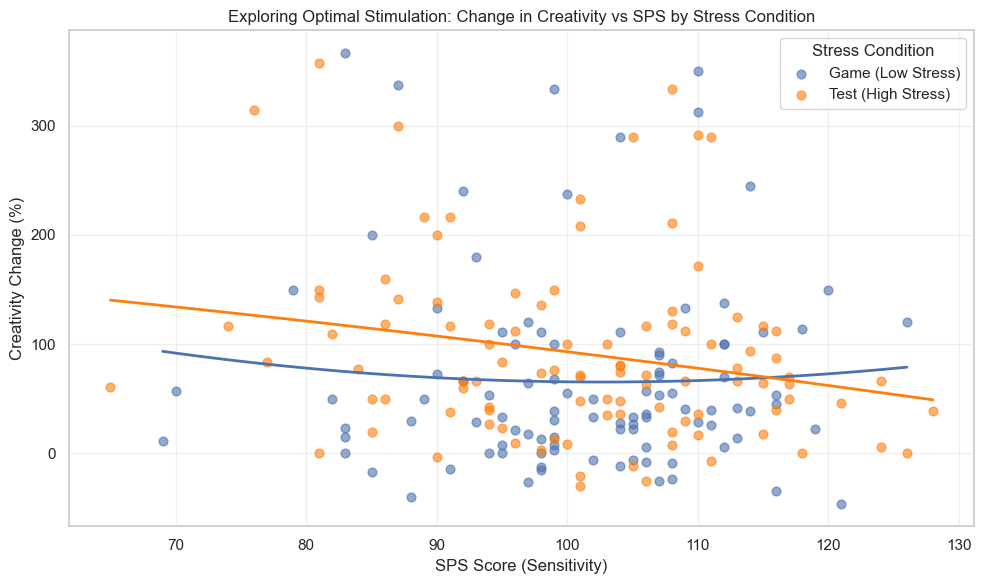

In [7]:
# ---- Step 1: Compute percentage change from Stage1 to Stage2 (as %) ----
df_plot = df.dropna(subset=['SPS', 'Stage1', 'Stage2', 'Group']).copy()
df_plot['ChangePct'] = (df_plot['Stage2'] - df_plot['Stage1']) / df_plot['Stage1'] * 100  # multiply by 100

# ---- Step 2: Plot scatter points by group ----
plt.figure(figsize=(10, 6))

colors = {0: "#4C72B0", 1: "#FF7F0E"}  # 0=Game (blue), 1=Test (orange)
labels = {0: "Game (Low Stress)", 1: "Test (High Stress)"}

for group in [0,1]:
    df_sub = df_plot[df_plot['Group'] == group].copy()  # avoid SettingWithCopyWarning
    # Scatter points
    plt.scatter(df_sub['SPS'], df_sub['ChangePct'], alpha=0.6, s=40, color=colors[group], label=labels[group])
    
    # Quadratic fit: ChangePct ~ SPS + SPS^2
    df_sub['SPS_sq'] = df_sub['SPS'] ** 2
    model = smf.ols("ChangePct ~ SPS + SPS_sq", data=df_sub).fit()
    
    # Predict line
    SPS_range = np.linspace(df_sub['SPS'].min(), df_sub['SPS'].max(), 100)
    pred_df = pd.DataFrame({'SPS': SPS_range, 'SPS_sq': SPS_range**2})
    pred_line = model.predict(pred_df)
    
    # Plot quadratic fit line
    plt.plot(SPS_range, pred_line, color=colors[group], lw=2)

plt.xlabel("SPS Score (Sensitivity)")
plt.ylabel("Creativity Change (%)")
plt.title("Exploring Optimal Stimulation: Change in Creativity vs SPS by Stress Condition")
plt.legend(title="Stress Condition")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Meaning of Creativity Change

The "Creativity Change" metric represents the relative improvement in a participant's divergent thinking performance from **Stage 1 (online questionnaire)** to **Stage 2 (offline experimental session)**. It is calculated as:

$$
\text{Creativity Change (\%)} = \frac{\text{Stage2 Score} - \text{Stage1 Score}}{\text{Stage1 Score}} \times 100
$$

This allows us to quantify how much each participant's creativity increased under the experimental conditions, relative to their baseline.

#### Stage 2 Scores Are Substantially Higher Than Stage 1 Scores

Across all participants, the Stage 2 scores are far higher than Stage 1 scores. This indicates that the offline experimental setting generally enhanced divergent thinking performance compared to the initial online measurement.

#### Higher Creativity Change in Low-to-Medium SPS Range

Participants with low-to-medium sensory processing sensitivity (SPS) show a markedly greater increase in creativity. This suggests that moderate sensitivity may provide optimal responsiveness to the experimental stimuli, consistent with a potential "inverted-U" relationship between stress/sensitivity and performance.

#### Group-Specific Trends

- **Game (low stress) group**: Creativity Change is relatively stable across SPS scores, displaying a weak or barely noticeable U-shaped trend.  
- **Test (high stress) group**: Creativity Change decreases as SPS increases; participants with higher sensitivity show smaller gains in creativity under high stress.  

This pattern provides preliminary support for the classic **Yerkes–Dodson law**, where moderate arousal leads to the greatest performance enhancement, and excessive sensitivity under high stress may impair gains.


The forth file, **"04_Predictable Directions in Machine Learning"** attempts to move from group analysis to individual prediction, attempting to further explore the potential of experiments using AI methods.